# Satoshi Nakamoto и компания

В поисках подозравеамых мы изучили статью [Поиск создателя Bitcoin](https://habr.com/post/130248/) на хабре и статью про [Сатоши Накамото](https://en.wikipedia.org/wiki/Satoshi_Nakamoto) в Википедии. Поисследовав источники, мы составили такой список подозреваемых:

* Ник Сабо
* Дориан Накамото
* Крейг Стивен Райт
* Вилли Лехдонвирта
* Майкл Клир
* Нил Кинг (Neal King), Чарльз Брай (Charles Bry) и Владимир Оксман (Vladimir Oksman)

## Анализ данных с помощью `delta`

In [1]:
import delta

KMedoids clustering not available.
You need a patched scikit-learn, see README.txt
/home/melanoya/maga/lib/python3.5/site-packages/delta/__init__.py:35: UserWarning: KMedoidsClustering not available
  warn("KMedoidsClustering not available")


### Препроцессинг

Загружаем кропус:

In [2]:
raw_corpus = delta.Corpus('./corpus/')

/home/melanoya/maga/lib/python3.5/site-packages/delta/corpus.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = metadata


Посмотрим на получившуюся матрицу:

In [3]:
raw_corpus

,the,of,to,and,a,in,is,that,for,as,...,evolves,ethics,estuary,estimations,estimating,estate,escrow,escaped,eternal,買
Craig_Wright,901.0,612.0,453.0,285.0,365.0,229.0,397.0,305.0,84.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
King_Oksman_Bry,1149.0,420.0,522.0,352.0,490.0,137.0,245.0,135.0,148.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael_Clear,574.0,337.0,226.0,234.0,320.0,188.0,302.0,180.0,158.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nick_Szabo,1210.0,1094.0,514.0,712.0,505.0,510.0,166.0,234.0,218.0,250.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
Vili_Lehdonvirta,376.0,266.0,278.0,323.0,138.0,197.0,114.0,119.0,70.0,88.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bitcoin_SN,209.0,108.0,117.0,56.0,99.0,28.0,50.0,34.0,30.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
print(raw_corpus.shape)

(6, 7692)


Уберем все слова, которых нет хотя бы в трети документов, чтобы убрать нерепрезентативные нули из векторов:

In [5]:
culled_corpus = raw_corpus.cull(1/3)
print(culled_corpus.shape)

(6, 2482)


/home/melanoya/maga/lib/python3.5/site-packages/delta/corpus.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = metadata


In [6]:
culled_corpus

,the,of,to,and,a,in,is,that,for,as,...,defining,topic,Random,deals,Society,storing,deeper,She,gradually,behaviours
Craig_Wright,901.0,612.0,453.0,285.0,365.0,229.0,397.0,305.0,84.0,107.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
King_Oksman_Bry,1149.0,420.0,522.0,352.0,490.0,137.0,245.0,135.0,148.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael_Clear,574.0,337.0,226.0,234.0,320.0,188.0,302.0,180.0,158.0,80.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
Nick_Szabo,1210.0,1094.0,514.0,712.0,505.0,510.0,166.0,234.0,218.0,250.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
Vili_Lehdonvirta,376.0,266.0,278.0,323.0,138.0,197.0,114.0,119.0,70.0,88.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
bitcoin_SN,209.0,108.0,117.0,56.0,99.0,28.0,50.0,34.0,30.0,26.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Корпус стал примерно в три раза меньше, но теперь в конце не так много нулей.

(но потом мы этим не пользуемся, WTF?)

### Анализ

Составим матоицу частотностей для топ 1500 слов и построим по ним матрицу расстояний между текстами.

In [7]:
top1500 = raw_corpus.get_mfw_table(1500)

/home/melanoya/maga/lib/python3.5/site-packages/delta/corpus.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = metadata


In [8]:
top1500

,the,of,to,and,a,in,is,that,for,as,...,victors,behavioural,formal,wherein,foragers,alone,occupational,subsequent,done,MitM
Craig_Wright,0.062254,0.042286,0.031300,0.019692,0.025219,0.015823,0.027430,0.021074,0.005804,0.007393,...,0.000000,0.000553,0.000000,0.000000,0.000000,0.000345,0.000000,0.000069,0.000000,0.000000
King_Oksman_Bry,0.074153,0.027106,0.033688,0.022717,0.031623,0.008842,0.015812,0.008712,0.009551,0.004518,...,0.000000,0.000000,0.000000,0.000516,0.000000,0.000000,0.000000,0.000258,0.000323,0.000516
Michael_Clear,0.043604,0.025600,0.017168,0.017776,0.024309,0.014281,0.022941,0.013674,0.012002,0.006077,...,0.000000,0.000000,0.000304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nick_Szabo,0.050029,0.045233,0.021252,0.029439,0.020880,0.021087,0.006863,0.009675,0.009013,0.010337,...,0.000331,0.000000,0.000041,0.000000,0.000331,0.000041,0.000000,0.000083,0.000041,0.000000
Vili_Lehdonvirta,0.042219,0.029868,0.031215,0.036268,0.015495,0.022120,0.012800,0.013362,0.007860,0.009881,...,0.000000,0.000000,0.000337,0.000000,0.000000,0.000225,0.000898,0.000000,0.000225,0.000000
bitcoin_SN,0.058691,0.030329,0.032856,0.015726,0.027801,0.007863,0.014041,0.009548,0.008425,0.007301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000281,0.000000,0.000000


In [9]:
distances = delta.functions.cosine_delta(top1500)
distances

/home/melanoya/maga/lib/python3.5/site-packages/delta/corpus.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = metadata
/home/melanoya/maga/lib/python3.5/site-packages/delta/deltas.py:627: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = Metadata(metadata, **kwargs)
/home/melanoya/maga/lib/python3.5/site-packages/delta/deltas.py:622: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.metadata = copy_from.metadata


,Craig_Wright,King_Oksman_Bry,Michael_Clear,Nick_Szabo,Vili_Lehdonvirta,bitcoin_SN
Craig_Wright,0.000000,1.269131,1.298963,1.140922,1.119110,1.104692
King_Oksman_Bry,1.269131,0.000000,1.100258,1.296499,1.230564,1.141610
Michael_Clear,1.298963,1.100258,0.000000,1.316576,1.245748,1.146577
Nick_Szabo,1.140922,1.296499,1.316576,0.000000,1.067341,1.255688
Vili_Lehdonvirta,1.119110,1.230564,1.245748,1.067341,0.000000,1.248127
bitcoin_SN,1.104692,1.141610,1.146577,1.255688,1.248127,0.000000


Матрица расстояний по 1500 cамых частотных слов говорит, что ближе всего к тексту статьи про биткойн тексты Крейга Райта, а дальше всего -- тексты Ника Шабо.

Впрочем, для всех из них расстояния достаточно похожи.

Теперь попробуем кластеризацию:

In [10]:
clustering = delta.Clustering(distances)

In [11]:
import matplotlib.pyplot as plt

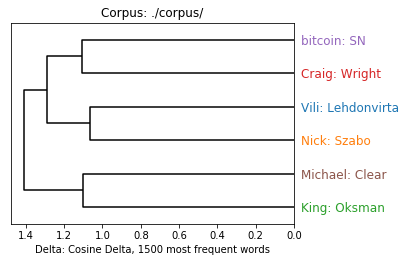

In [12]:
delta.Dendrogram(clustering).show()

на дендрограмме тоже видно, что Крейга Райт ближе всех к тексту про биткоин. 

P.S. Мы слили все тексты каждого автора в один файл.

In [17]:
clusters = clustering.fclustering()
print(clusters.describe())

4 clusters of 6 documents (ground truth: 6 groups):
{1: ['King: Oksman', 'Michael: Clear'],
 2: ['Nick: Szabo', 'Vili: Lehdonvirta'],
 3: ['Craig: Wright'],
 4: ['bitcoin: SN']}



а в совместный кластер с текстом биткоина никто не выделился

In [14]:
clusters.evaluate()

Cluster Errors         2.000000
Adjusted Rand Index    0.000000
Homogeneity            0.742098
Completeness           1.000000
V Measure              0.851959
Purity                 0.666667
Entropy                0.257902
dtype: float64

## Contributions:

* сборка текстов: Саша Мартынова, Маша Шеянова
* предварительный анализ, матрица расстояний: Маша Шеянова\
* визуализация, кластеризация: Саша Мартынова